## arboles de decision - problema clasificacion de flores

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv("iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
data.shape

(150, 5)

In [110]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [111]:
columns = data.columns.values.tolist()
columns

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [112]:
columnasPredictoras = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
columnaObjetivo = ['Species']

## se crea el modelo

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
X = data[columnasPredictoras]
Y = data[columnaObjetivo]

In [115]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99) ##random_state es simplemente para colocar una semilla de simulacion.
tree.fit(X,Y) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [116]:
data["prediccion"]= tree.predict(data[columnasPredictoras])
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,prediccion
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa
5,5.4,3.9,1.7,0.4,setosa,setosa
6,4.6,3.4,1.4,0.3,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
9,4.9,3.1,1.5,0.1,setosa,setosa


## validacion cruzada para escoger el max_depth correcto (es decir hacer la poda correcta)

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [118]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(tree,X,Y,scoring="accuracy", cv=cv, n_jobs=1))
    print("score para i = ",i, "es de ",score)
    print("las columnas de importancia son:   ",tree.feature_importances_)

score para i =  1 es de  0.5666666666666667
las columnas de importancia son:    [0. 0. 1. 0.]
score para i =  2 es de  0.9200000000000002
las columnas de importancia son:    [0.         0.         0.66620285 0.33379715]
score para i =  3 es de  0.9400000000000001
las columnas de importancia son:    [0.         0.         0.68976981 0.31023019]
score para i =  4 es de  0.9333333333333333
las columnas de importancia son:    [0.         0.         0.66869158 0.33130842]
score para i =  5 es de  0.9333333333333333
las columnas de importancia son:    [0.         0.         0.66869158 0.33130842]
score para i =  6 es de  0.9333333333333333
las columnas de importancia son:    [0.         0.         0.66869158 0.33130842]
score para i =  7 es de  0.9333333333333333
las columnas de importancia son:    [0.         0.         0.66869158 0.33130842]
score para i =  8 es de  0.9333333333333333
las columnas de importancia son:    [0.         0.         0.66869158 0.33130842]
score para i =  9 es de 

### * esto significa que el score mas alto se obtiene con max_depth=3, por lo tanto a la hora de crear el modelo con max_depth=5 como hicimos es mejor colocar max_depth=3

### * y que las columnas de importancia son la columna 3 y 4

## creacion del grafico del arbol

In [119]:
from sklearn.tree import export_graphviz

In [120]:
with open("iris_arboldecision.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=columnasPredictoras)
    dotfile.close()

In [121]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [122]:
from graphviz import Source

In [123]:
file = open("iris_arboldecision.dot", "r")
text = file.read()

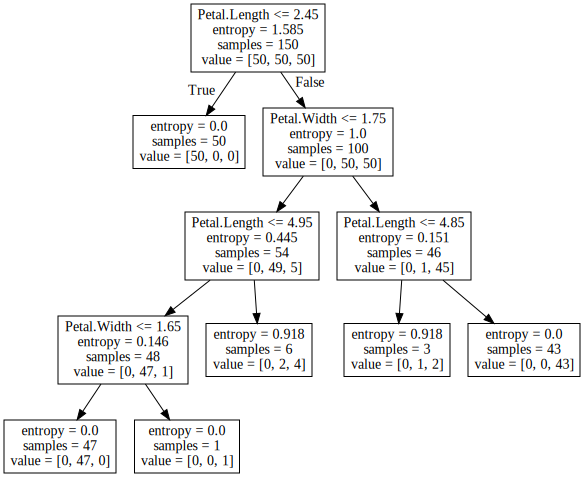

In [124]:
Source(text)